The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


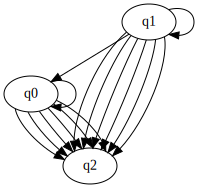

In [40]:
%load_ext autoreload
%autoreload 2
import pdfa

pdfa = pdfa.PDFA(configFileName='config/pdfa_self_driving_config.yaml')

numSamples = int(1e5)
traces, stringLengths = pdfa.generateTraces(numSamples)

fName = 'PDFASamples_train.swag'
pdfa.writeTracesToFile(fName, samples, numSamples, stringLengths)

pdfa.drawIPython()

# Flexfringe Usage

Two choices: Using it via Python function calls, or working with the command line.

## Step 1

Install all dependencies and compile flexfringe (development branch due to some technicalities using WIFEXITED macro used for the SAT solver's process)

In [ ]:
# for the C++ code
!apt install graphviz
!apt install libgsl-dev
!apt install libpopt-dev

# for visualization and notebook interface
!pip install graphviz

# Stamina data
!wget http://stamina.chefbe.net/downloads/grid.tar.gz
!tar xfz grid.tar.gz

# cloning the repository
!rm -rf dfasat
!git clone https://bitbucket.org/chrshmmmr/dfasat.git

In [ ]:
# building the repository
# it is important to check out the development branch on colab
!cd dfasat && git checkout  && make clean all

## Step 2 
Provide simple command line wrappers

In [22]:
import subprocess
import sys
import graphviz

from IPython.display import Image, display

def flexfringe(*args, **kwargs):
  
  command = ["--help"]

  if(len(kwargs) > 1):
    command = []
    for key in kwargs:
      command += ["-" + key + "=" + kwargs[key]]

  print("%s" % subprocess.run(["dfasat/flexfringe",] + command + [args[0]], stdout=subprocess.PIPE).stdout.decode())
  
  
  try:
    with open("dfafinal.dot") as fh:
      return fh.read()
  except FileNotFoundError:
     print("No output file was generated.")

  return None
    
def show(data):
  if data=="":
    pass
  else:
    g = graphviz.Source(data, format="png")
    g.render()
    display(Image(g.render()))
 

In [ ]:
!ls dfasat/data/staminadata

## Step 3

call the flexfringe function with the filename and named arguments just as described in help. Mind that "heuristic-name" is actually an expression, not a valid name. Use the short form in this case.

The flexringe() call returns a string with the dot output.

In [39]:
data = flexfringe("PDFASamples_train_1e6.swag", S="./lingeling/lingeling",
                  h="overlap_driven", d="overlap_data")

welcome, running git commit 781716d7759530c2f99b09888253df7e8ce88a47 with: dfasat/flexfringe -S=./lingeling/lingeling -h=overlap_driven -d=overlap_data PDFASamples_train_1e6.swag 
sat_program : ./lingeling/lingeling
valid: overlap_driven
aic 1
alergia 1
alergia94 1
conflict_driven 1
conflict_edsm_driven 1
conflict_overlap_driven 1
count_driven 1
depth_driven 1
evidence_driven 1
fixed_depth_mse_error 1
full_overlap_driven 1
kldistance 1
likelihoodratio 1
mealy 1
mse_error 1
overlap4logs 1
overlap_driven 1
process_mining 1
Using heuristic overlap_driven
Creating apta using evaluation class overlap_data
batch mode selected
reading data finished, processing:
dfasat running x847484  x496180  x430429  x205312  x136380  x132015  x106415  x95656  x84497  x67957  x47347  x43255  x37418  x30240  x25444  x24272  x24044  x18127  x12684  x11525  x11479  x11104  x11037  x10820  x10791  x10678  x10020  x8480  x7820  x7485  x7429  x7411  x7409  x7343  x7312  x7291  x7251  x7214  x6907  x6545  x6460  x

## Step 4
Visualize the output by feeding the dot string to the show() function.

In [17]:
show(data)

Error: Source.gv: syntax error in line 1 near 'No'


CalledProcessError: Command '['dot', '-Tpng', '-O', 'Source.gv']' returned non-zero exit status 1. [stderr: b"Error: Source.gv: syntax error in line 1 near 'No'\n"]

## Step 5

Compare with a direct command line. Each cell can act as a shell by prepending a bang ! to the commands.

In [ ]:
# !dfasat/flexfringe -h=overlap_driven -d=overlap_data /content/grid/1_training.txt 
!dfasat/flexfringe --help

In [ ]:
!dot -Tpng dfafinal.dot > outfile.png

## Step 6

Visualize the files using inline Python calls, e.g. display and Image

In [ ]:
display(Image("outfile.png"))